In [1]:
import numpy as np
import gym

In [81]:
import sys
import gym
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

env = gym.make('MountainCar-v0')

# State: 
num_states = env.observation_space
num_actions = env.action_space

print(type(num_states))
print(type(num_actions))

# # Init Q-Table
# Q_table = np.zeros([num_states, num_actions])

# learning_rate = 0.1
# discount_factor = 0.9
# epsilon = 1.0
# max_epsilon = 1.0
# min_epsilon = 0.01

# n_episodes = 50000

# for episode in range(1, n_episodes + 1):
#     state = env.reset()  
#     done = False
    
#     while (not done):    
#         # Either explore or exploit (will exploit more increasingly)
#         random_val = np.random.rand()
#         if (random_val < epsilon):    
#             action = env.action_space.sample()
#         else:
#             action = np.argmax(Q_table[state, :])
            
#         # Perform the action
#         next_state, reward, done, info = env.step(action)        
              
#         # Maximum expected future reward one steps from the next state
#         next_max = np.max(Q_table[next_state, :])
          
#         # Update Q-Table
#         Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * next_max - Q_table[state, action])
        
#         # Assign new state
#         state = next_state
        
#     # Reduce exploration
#     epsilon = min_epsilon + (max_epsilon - min_epsilon) * (1 - episode/n_episodes)  

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
<class 'gym.spaces.box.Box'>
<class 'gym.spaces.discrete.Discrete'>


Run with random agent

In [82]:
state = env.reset()
score = 0
for t in range(200):
    action = env.action_space.sample()
    env.render()
    state, reward, done, _ = env.step(action)
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

Final score: -200.0


In [83]:
# Explore state (observation) space
print("State space:", env.observation_space)
print("- low:", env.observation_space.low)
print("- high:", env.observation_space.high)

State space: Box(2,)
- low: [-1.2  -0.07]
- high: [0.6  0.07]


In [84]:
# Explore the action space
print("Action space:", env.action_space)

# Generate some samples from the action space
print("Action space samples:")
print(np.array([env.action_space.sample() for i in range(10)]))

Action space: Discrete(3)
Action space samples:
[1 1 1 1 1 1 2 2 1 1]


In [85]:
def create_uniform_grid(low, high, bins=(10, 10)):
    """Define a uniformly-spaced grid that can be used to discretize a space.
    
    Parameters
    ----------
    low : array_like
        Lower bounds for each dimension of the continuous space.
    high : array_like
        Upper bounds for each dimension of the continuous space.
    bins : tuple
        Number of bins along each corresponding dimension.
    
    Returns
    -------
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    """
    step = (high[0] - low[0]) / bins[0]
    array_a = low[0] + np.arange(1, bins[0]) * step
    
    step = (high[1] - low[1]) / bins[1]
    array_b = low[1] + np.arange(1, bins[1]) * step    
    # TODO: Implement this
    return [array_a, array_b]

In [86]:
low = [-1.0, -5.0]
high = [1.0, 5.0]
create_uniform_grid(low, high)  # [test]

[array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

In [99]:
def discretize_(sample, grid):
    """Discretize a sample as per given grid.
    
    Parameters
    ----------
    sample : array_like
        A single sample from the (original) continuous space.
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    
    Returns
    -------
    discretized_sample : array_like
        A sequence of integers with the same number of dimensions as sample.
    """
    world_size = samples[0].shape[0]
    
    sample_index = 0
    
    results = np.zeros([1, world_size], dtype=np.int)
      
    # Loop all dimensions
    for index in range(world_size):
        # Find the index of samples for each dimension
        inds = np.digitize(sample[index], grid[index])
        results[0][index] = int(inds)
        
    return results


# Test with a simple grid and some samples
grid = create_uniform_grid([-1.0, -5.0], [1.0, 5.0])
samples = np.array(
    [[-1.0 , -5.0],
     [-0.81, -4.1],
     [-0.8 , -4.0],
     [-0.5 ,  0.0],
     [ 0.2 , -1.9],
     [ 0.8 ,  4.0],
     [ 0.81,  4.1],
     [ 1.0 ,  5.0]])
discretized_samples = np.array([discretize_(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples:", repr(discretized_samples), sep="\n")


Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples:
array([[[0, 0]],

       [[0, 0]],

       [[1, 1]],

       [[2, 5]],

       [[5, 3]],

       [[9, 9]],

       [[9, 9]],

       [[9, 9]]])


In [93]:
discretized_samples.size

16

IndexError: index 1 is out of bounds for axis 1 with size 1

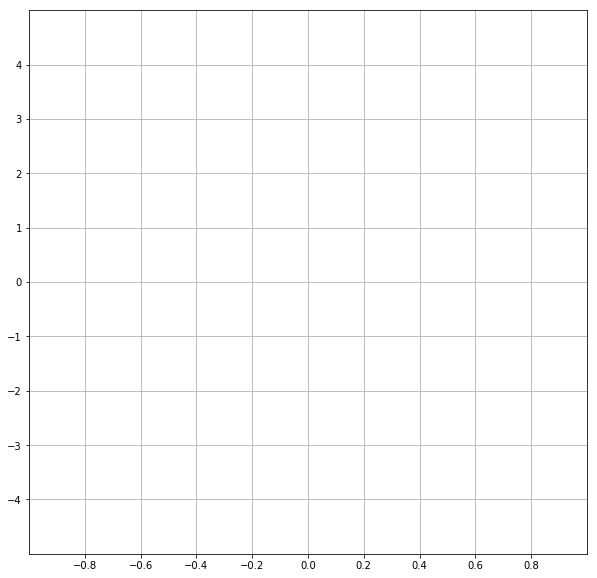

In [100]:
import matplotlib.collections as mc

def visualize_samples(samples, discretized_samples, grid, low=None, high=None):
    """Visualize original and discretized samples on a given 2-dimensional grid."""

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Show grid
    ax.xaxis.set_major_locator(plt.FixedLocator(grid[0]))
    ax.yaxis.set_major_locator(plt.FixedLocator(grid[1]))
    ax.grid(True)
    
    # If bounds (low, high) are specified, use them to set axis limits
    if low is not None and high is not None:
        ax.set_xlim(low[0], high[0])
        ax.set_ylim(low[1], high[1])
    else:
        # Otherwise use first, last grid locations as low, high (for further mapping discretized samples)
        low = [splits[0] for splits in grid]
        high = [splits[-1] for splits in grid]

    # Map each discretized sample (which is really an index) to the center of corresponding grid cell
    grid_extended = np.hstack((np.array([low]).T, grid, np.array([high]).T))  # add low and high ends
    grid_centers = (grid_extended[:, 1:] + grid_extended[:, :-1]) / 2  # compute center of each grid cell
    locs = np.stack(grid_centers[i, discretized_samples[:, i]] for i in range(len(grid))).T  # map discretized samples

    ax.plot(samples[:, 0], samples[:, 1], 'o')  # plot original samples
    ax.plot(locs[:, 0], locs[:, 1], 's')  # plot discretized samples in mapped locations
    ax.add_collection(mc.LineCollection(list(zip(samples, locs)), colors='orange'))  # add a line connecting each original-discretized sample
    ax.legend(['original', 'discretized'])

    
visualize_samples(samples, discretized_samples, grid, low, high)